<a href="https://colab.research.google.com/github/t4toast/project-one/blob/main/Sands_project_one.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project one, final
- Diane T Sands

-steps to remember:
1. import all libraries
2. Load the dataset
3. make copy of df
5. check about dataset info
6. df.isna().sum().sum()
7. check for duplicates and drop the duplicates - df.duplicated().sum()
8. check for incosistacneis
9. Split the dataset-train/test
10. column selection - separate the categorical and numerical one data
11. handling missing values using imputer for categorical and numerical dataset
12. justify the strategy used in code like why are you using mean, median or mode.
13. Make pipleines
14. use column transformers for scaling , ohe, for the categorical and numerical data.
15.fit the data to train and transform train/test both


In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
from sklearn import set_config
set_config(display='diagram')

In [88]:
#load the dataset
filename = '/content/drive/MyDrive/Colab Notebooks/sales_predictions.csv'
df = pd.read_csv(filename)

In [89]:
#make a copy of the data
ml_df = df.copy()

In [90]:
#explore the data some 
ml_df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [91]:
#check for missing data
ml_df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [92]:
#check for duplicates
ml_df.duplicated().sum()

0

In [117]:
#no duplicated rows. Can drop columns Item Identifier & Outlet Year 
ml_df.drop(['Item_Identifier', 'Outlet_Establishment_Year'], axis=1) 


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,NaN,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,NaN,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,Medium,Tier 3,Supermarket Type2,1845.5976


In [94]:
#Identify the features (X) and target (y): Assign the "Item_Outlet_Sales" column as your target 
#and the rest of the relevant variables as your features matrix.  
X = ml_df.drop('Item_Outlet_Sales', axis=1,)
y = ml_df['Item_Outlet_Sales']

In [95]:
#Perform a train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)


In [96]:
#Make sure your imputation of missing values occurs  after the train test split using SimpleImputer.  
#Item Weight and Outlet Size are the two categories with missing data.
#look again at the data...

ml_df['Item_Weight'].describe()  

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [97]:
ml_df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [98]:
#Create a ColumnTransformer to preprocess the data. 
cat_selector = make_column_selector(dtype_include= 'object')
num_selector = make_column_selector(dtype_include= 'number')


In [99]:
#scale the data
scaler = StandardScaler()
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [100]:
# Imputers
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')



In [101]:
#make pipelines
number_pipe = make_pipeline(mean_imputer, scaler)
number_pipe


Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [102]:
categorical_pipe = make_pipeline(freq_imputer, encoder)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [103]:
#make tuples
num_tuple = (number_pipe, num_selector)
cat_tuple = (categorical_pipe, cat_selector)

In [104]:
#preprocessor
preprocessor = make_column_transformer(cat_tuple, num_tuple, remainder='passthrough')


In [105]:
col_transformer = make_column_transformer(num_tuple, cat_tuple, remainder = 'drop')
col_transformer.fit(X_train)


ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f55b96baed0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f55b96baf10>)])

In [106]:
#define the MAE, MSE, RMSE and R2 series of code to use later
def evaluate_regression(y_true, y_pred):
  
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_true, y_pred)

  print(f'scores: \nMAE: {mae:,.2f} \nMSE: {mse:,.2f} \nRMSE: {rmse:,.2f} \nR2: {r2:.2f}')


In [107]:
#linear regression model
lin_reg = LinearRegression()
lin_model_pipe = make_pipeline(col_transformer, lin_reg)

lin_model_pipe.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f55b96baed0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f55b96baf10>)])),
                ('linearregression', LinearRegression())])

In [108]:
#run evaluation parameters
print('Training')
evaluate_regression(y_train, lin_model_pipe.predict(X_train))
print('Testing')
evaluate_regression(y_test, lin_model_pipe.predict(X_test))

Training
scores: 
MAE: 787.68 
MSE: 1,090,402.31 
RMSE: 1,044.22 
R2: 0.63
Testing
scores: 
MAE: 3,296,404,132,227.80 
MSE: 2,388,215,938,479,253,396,893,204,480.00 
RMSE: 48,869,376,284,942.02 
R2: -865616382213080612864.00


In [109]:
#do a decision tree

dec_tree = DecisionTreeRegressor(random_state = 42)
dt_model_pipe = make_pipeline(col_transformer, dec_tree)
dt_model_pipe.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f55b96baed0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f55b96baf10>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [110]:
#run evaluation parameters
print('Training')
evaluate_regression(y_train, dt_model_pipe.predict(X_train))
print('Testing')
evaluate_regression(y_test, dt_model_pipe.predict(X_test))

Training
scores: 
MAE: 0.00 
MSE: 0.00 
RMSE: 0.00 
R2: 1.00
Testing
scores: 
MAE: 991.65 
MSE: 2,136,543.33 
RMSE: 1,461.69 
R2: 0.23


In [111]:
dec_tree.get_depth()

81

In [112]:
# List of values to try for max_depth:
depths = list(range(1, 82)) # will try every value between 0 and 81
# Data frame to store the score for each value of max_depth:
scores = pd.DataFrame(index=depths, columns=['Test Score','Train Score'])
for depth in depths:
    dec_tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    dt_model_pipe.fit(X_train, y_train)
    train_score = dt_model_pipe.score(X_train, y_train)
    test_score = dt_model_pipe.score(X_test, y_test)
    scores.loc[depth, 'Train Score'] = train_score
    scores.loc[depth, 'Test Score'] = test_score


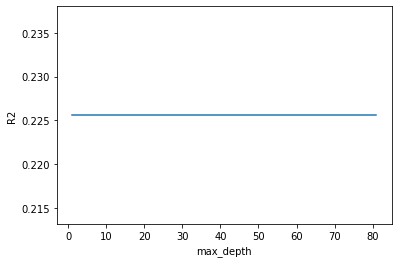

In [113]:
# Visualize which max_depth leads to the highest r2 score
import matplotlib.pyplot as plt
plt.plot(depths, scores['Test Score'])
plt.xlabel('max_depth')
plt.ylabel('R2');



In [114]:
sorted_scores = scores.sort_values(by='Test Score', ascending=False)
sorted_scores.head()


,Test Score,Train Score
1,0.225603,1.0
42,0.225603,1.0
60,0.225603,1.0
59,0.225603,1.0
58,0.225603,1.0


In [120]:
#while all of the results look the same to me, the ranking says 1 is the best depth..


I have have tried 2 different models on the data set. 

Overall, which model do you recommend? >>> In the linear regression model, the training R2 score is low and the test R2 score is a massive negative which suggests it is a bad model. 
However, the decision tree had no scores for the metrics (except R2, which was perfect). This data mapped weirdly and the test R2 was really low. 
If time and brain cells were not an issue here, I would keep running regression models (bagged tree, random forest, etc) until one of them turned up better metics. 